In [1]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sea
pd.options.mode.chained_assignment = None

In [2]:
def get_difficulty():
    stats = requests.get('https://etherchain.org/api/basic_stats')
    return stats.json()['currentStats']['difficulty']

In [27]:
def predict_difficulty():
    r = requests.get('https://api.nanopool.org/v1/eth/block_stats/', params = {'offset':0, 'count':10})
    data =  pd.DataFrame(r.json()['data'])
    
    data['date'] = data['date'].apply(lambda x: datetime.fromtimestamp(x))
    data = data.set_index('date').sort_index()
    data = data.loc['2017-11-12':]
    return data

In [28]:
data = predict_difficulty()

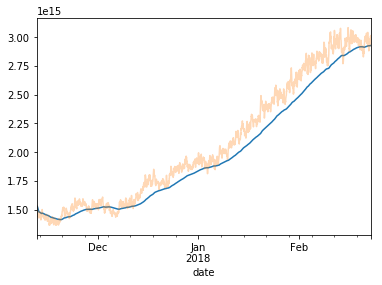

In [29]:
x = data.copy()
x['nums'] = range(len(x))

fig, ax = plt.subplots()
x['difficulty'].ewm(span = 300).mean().plot()
x['difficulty'].plot(alpha = 0.3)

plt.show()

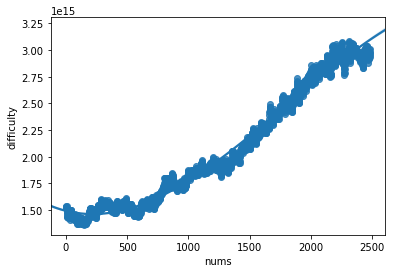

In [16]:
sea.regplot(x['nums'], x['difficulty'], order=3)
plt.show()

In [7]:
diff

NameError: name 'diff' is not defined

In [ ]:
2990297892460000 - diff